# Edge Detection

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(121)
    ax.imshow(img,cmap)

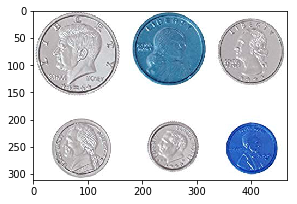

In [48]:
# 因為這邊主要是偵測照片中貓咪的外誆, 所以對顏色不正確是沒有關係的
img = cv2.imread('../Test_Photo/coins.jpg')
display(img)

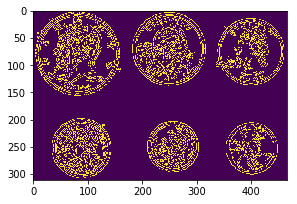

In [52]:
# 透過 cv2.Canny() 我們可以試著找出照片中貓咪的外誆
# cv2.Canny(img, threshold1, threshold2)
# Threshold1 -> Lower Bound, 當圖片的值低於 Lower bound 時將會無視
# Threshold2 -> Upper Bound, 當圖片的值高於 Higher bound 時將會被判為是 Edge
edges = cv2.Canny(img,10,200)
display(edges)

#### 如上的結過並不是這麼理想, 所以我們要透過更改 threshold1 跟 threshold2 來讓照片更清楚

In [53]:
# Choosing Thresholds
# 先取出這張照片所有顏色的 median
med_val = np.median(img)

In [54]:
# 我們先來選擇 Threshold1, lower bound
# 我們透過剛剛算出的中間值 * 0.7 得出某個值
# 再透過 max 的功能來算出 0與剛剛算出得值哪個來的大
lower = int(max(0,med_val*0.7))

In [55]:
# 我們先來選擇 Threshold1, upper bound
# 我們透過剛剛算出的中間值 * 1.3 得出某個值
# 再透過 min 的功能來算出 255與剛剛算出得值哪個來的小
upper = int(min(255,med_val*1.3))

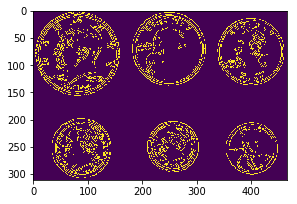

In [56]:
edges = cv2.Canny(image=img, threshold1=lower , threshold2=upper)
display(edges)

#### 透過調整過後的Threshold後, 我們可以發現上面的照片有比之前的來得好許多, 如果要更好的結果就要在調整Threshold

#### 除此之外, 我們也可以透過一些圖片的處理來減少一些雜訊. 但這就需要慢慢嘗試Threshold

In [57]:
blurred_img = cv2.blur(img,ksize=(5,5))
b_med = np.median(blurred_img)
lower = int(max(0,med_val*0.7))
upper = int(min(255,med_val*1.3))

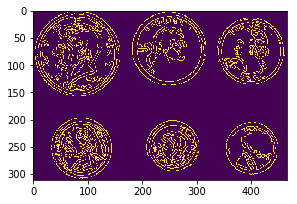

In [58]:
edges = cv2.Canny(image=blurred_img, threshold1=lower-90, threshold2=upper-900)
display(edges)